# Real Estate Clean up

This is a real dataset, and it was downloaded using web scraping techniques. The data contains registers from **Fotocasa** which is one of the most popular real estate websites in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and in no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [21]:
import pandas as pd

# This CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [22]:
ds.price.max()

np.int64(8500000)

In [23]:
# TODO

max_price = ds.loc[ds['price'] == ds.price.max(), ['price', 'address']]
max_price

,price,address
13110,8500000,El Escorial


In [24]:
price = max_price['price'].values[0]
address = max_price['address'].values[0]

In [25]:
print(f"The house with {address} is the mose expensive and its price is {price:,} USD.")

The house with El Escorial is the mose expensive and its price is 8,500,000 USD.


In [26]:
ds.columns

Index(['Unnamed: 0', 'id_realEstates', 'isNew', 'realEstate_name',
       'phone_realEstate', 'url_inmueble', 'rooms', 'bathrooms', 'surface',
       'price', 'date', 'description', 'address', 'country', 'level1',
       'level2', 'level3', 'level4', 'level5', 'level6', 'level7', 'level8',
       'upperLevel', 'countryId', 'level1Id', 'level2Id', 'level3Id',
       'level4Id', 'level5Id', 'level6Id', 'level7Id', 'level8Id', 'accuracy',
       'latitude', 'longitude', 'zipCode', 'customZone'],
      dtype='object')

In [27]:
ds.surface

0        103.0
1          NaN
2         99.0
3         86.0
4        106.0
         ...  
15330     96.0
15331    150.0
15332    175.0
15333    101.0
15334    152.0
Name: surface, Length: 15335, dtype: float64

In [28]:
ds.address

0        Calle Presidente Felipe Gonzalez, Arganda del Rey
1                         Calle Polvoranca, 6, Fuenlabrada
2                Calle Reyes Católicos, Boadilla del Monte
3                           Barrio San Andres, Fuenlabrada
4                                          Arganda del Rey
                               ...                        
15330                                       Madrid Capital
15331                               Velilla de San Antonio
15332                                         Torrelodones
15333                               Velilla de San Antonio
15334              Paseo de la Castellana,  Madrid Capital
Name: address, Length: 15335, dtype: object

#### Exercise 02. Which is the cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [29]:
# TODO

sum(ds['price'] == 0)

# ds['price'].min()

ds_non_zero_price = ds[ds['price'] > 0]
ds_non_zero_price

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


In [30]:
ds.shape

(15335, 37)

In [31]:
ds[ds['price'] > 0]

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


In [32]:
ds_non_zero_price['price'].min()

np.int64(600)

In [33]:
mask = ds_non_zero_price['price'] == ds_non_zero_price['price'].min()
mask

0        False
1        False
2        False
3        False
4        False
         ...  
15330    False
15331    False
15332    False
15333    False
15334    False
Name: price, Length: 15275, dtype: bool

In [34]:
ds_non_zero_price[mask]

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
7491,7492,153977752,False,redpiso coslada,910759552.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,80.0,600,...,0,0,0,0,0,0,"40,41869","-3,54004",NaN,NaN


In [35]:
ds_non_zero_price.loc[mask, ['price', 'address']]

,price,address
7491,600,"Berlin, Coslada"


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The biggest house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smallest house is located on County Road 1 N and its surface is 200 meters`

In [36]:
ds['surface'].isna().sum()

np.int64(1250)

In [37]:
ds['surface'].notna()

0         True
1        False
2         True
3         True
4         True
         ...  
15330     True
15331     True
15332     True
15333     True
15334     True
Name: surface, Length: 15335, dtype: bool

In [38]:
ds_with_surface = ds[ds['surface'].notna()]
ds_with_surface

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
5,6,153934794,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,70.0,315000,...,0,0,0,0,0,0,"40,53391","-3,89445",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


In [39]:
# print(f"The house with {address} is the mose expensive and its price is {surface} meter squared.")

#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the names of the populations with a comma as a separator. For example:

`> print(populations)`

`population1, population2, population3, ...`

In [40]:
# TODO
ds.columns
# ds.level5
# ds[ds.level5Id > 0]

Index(['Unnamed: 0', 'id_realEstates', 'isNew', 'realEstate_name',
       'phone_realEstate', 'url_inmueble', 'rooms', 'bathrooms', 'surface',
       'price', 'date', 'description', 'address', 'country', 'level1',
       'level2', 'level3', 'level4', 'level5', 'level6', 'level7', 'level8',
       'upperLevel', 'countryId', 'level1Id', 'level2Id', 'level3Id',
       'level4Id', 'level5Id', 'level6Id', 'level7Id', 'level8Id', 'accuracy',
       'latitude', 'longitude', 'zipCode', 'customZone'],
      dtype='object')

In [41]:
unique_populations = ds['level5'].unique() 
unique_populations.sort()

In [42]:
unique_populations

array([' Madrid Capital', 'Ajalvir', 'Alcalá de Henares', 'Alcobendas',
       'Alcorcón', 'Aldea del Fresno', 'Algete', 'Alpedrete', 'Ambite',
       'Anchuelo', 'Aranjuez', 'Arganda del Rey',
       'Arroyomolinos (Madrid)', 'Batres', 'Becerril de la Sierra',
       'Belmonte de Tajo', 'Boadilla del Monte', 'Braojos',
       'Brea de Tajo', 'Brunete', 'Buitrago del Lozoya', 'Bustarviejo',
       'Cabanillas de la Sierra', 'Cadalso de los Vidrios',
       'Camarma de Esteruelas', 'Campo Real', 'Canencia', 'Carabaña',
       'Casarrubuelos', 'Cenicientos', 'Cercedilla', 'Chapinería',
       'Chinchón', 'Ciempozuelos', 'Cobeña', 'Collado Mediano',
       'Collado Villalba', 'Colmenar Viejo', 'Colmenar de Oreja',
       'Colmenar del Arroyo', 'Colmenarejo', 'Corpa', 'Coslada',
       'Cubas de la Sagra', 'Daganzo de Arriba', 'El Atazar',
       'El Berrueco', 'El Boalo - Cerceda – Mataelpino', 'El Escorial',
       'El Molar (Madrid)', 'El Vellón', 'El Álamo', 'Estremera',
       'Fresne

In [43]:
len(unique_populations)

168

In [44]:
print(", ".join(unique_populations))

 Madrid Capital, Ajalvir, Alcalá de Henares, Alcobendas, Alcorcón, Aldea del Fresno, Algete, Alpedrete, Ambite, Anchuelo, Aranjuez, Arganda del Rey, Arroyomolinos (Madrid), Batres, Becerril de la Sierra, Belmonte de Tajo, Boadilla del Monte, Braojos, Brea de Tajo, Brunete, Buitrago del Lozoya, Bustarviejo, Cabanillas de la Sierra, Cadalso de los Vidrios, Camarma de Esteruelas, Campo Real, Canencia, Carabaña, Casarrubuelos, Cenicientos, Cercedilla, Chapinería, Chinchón, Ciempozuelos, Cobeña, Collado Mediano, Collado Villalba, Colmenar Viejo, Colmenar de Oreja, Colmenar del Arroyo, Colmenarejo, Corpa, Coslada, Cubas de la Sagra, Daganzo de Arriba, El Atazar, El Berrueco, El Boalo - Cerceda – Mataelpino, El Escorial, El Molar (Madrid), El Vellón, El Álamo, Estremera, Fresnedillas de la Oliva, Fresno de Torote, Fresno de Torote - Serracines, Fuenlabrada, Fuente El Saz de Jarama, Fuentidueña de Tajo, Galapagar, Garganta de los Montes, Gargantilla del Lozoya, Gascones, Getafe, Griñón, Guadal

In [45]:
ds[['country', 'level1',
       'level2', 'level3', 'level4', 'level5', 'level6', 'level7', 'level8']]

,country,level1,level2,level3,level4,level5,level6,level7,level8
0,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Perlita,NaN
1,España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN
2,España,Madrid,Madrid,Zona Noroeste,"Boadilla del Monte, Zona de",Boadilla del Monte,NaN,Sector B,NaN
3,España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN
4,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Centro,NaN
...,...,...,...,...,...,...,...,...,...
15330,España,Madrid,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Tetuán,Berruguete
15331,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velilla de San Antonio,NaN,NaN,NaN
15332,España,Madrid,Madrid,Zona Noroeste,"Torrelodones, Zona de",Torrelodones,NaN,Casco Antiguo,NaN
15333,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velilla de San Antonio,NaN,NaN,NaN


#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`True` or `False`) followed by the rows/cols that contains NAs.

In [46]:
# TODO
ds.isna()

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
15331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
15332,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
15333,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [47]:
na_columns = ds.isna().sum()

na_columns = na_columns[na_columns > 0]

na_columns

realEstate_name        10
phone_realEstate      794
rooms                 353
bathrooms             345
surface              1250
description           142
level4               6643
level6              14627
level7               2277
level8               8579
zipCode             15335
customZone          15335
dtype: int64

In [48]:
ds.isna().any(axis=1).sum()

np.int64(15335)

In [49]:
ds[ds.isna().any(axis=1)]

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


In [50]:
na_columns.index.tolist()

['realEstate_name',
 'phone_realEstate',
 'rooms',
 'bathrooms',
 'surface',
 'description',
 'level4',
 'level6',
 'level7',
 'level8',
 'zipCode',
 'customZone']

#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions.

In [51]:
# TODO
ds.shape

(15335, 37)

In [52]:
columns_to_drop = ['level4',
                    'level6',
                    'level7',
                    'level8',
                    'zipCode',
                    'customZone']
ds_clean = ds.drop(columns = columns_to_drop)

In [53]:
ds.drop(columns_to_drop, axis=1).shape

(15335, 31)

In [54]:
ds_clean.shape

(15335, 31)

In [55]:
ds.shape

(15335, 37)

In [56]:
ds_clean = ds_clean.dropna().copy()

In [57]:
ds_clean

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624"
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624"
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624"
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237"
5,6,153934794,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,70.0,315000,...,0,0,0,0,0,0,0,0,"40,53391","-3,89445"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15329,15330,153901392,False,pqcentro,912665783.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,122.0,264500,...,0,0,0,0,0,0,0,1,"40,24007","-3,70606"
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,0,0,"40,45416","-3,70286"
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,0,0,"40,36652","-3,48951"
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,0,0,"40,36967","-3,48105"


In [58]:
ds_clean.isna().any().any()

np.False_

#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value.

In [59]:
ds_clean['price'].mean()

np.float64(497197.5097030629)

In [60]:
# TODO
(ds_clean['level5'] == "Arroyomolinos (Madrid)").sum()

np.int64(110)

In [61]:
mask = ds_clean['level5'] == "Arroyomolinos (Madrid)"
ds_clean.loc[mask, ['price','level5']]

,price,level5
453,165338,Arroyomolinos (Madrid)
607,251646,Arroyomolinos (Madrid)
613,396000,Arroyomolinos (Madrid)
707,225000,Arroyomolinos (Madrid)
852,373000,Arroyomolinos (Madrid)
...,...,...
15019,218000,Arroyomolinos (Madrid)
15089,230000,Arroyomolinos (Madrid)
15091,217000,Arroyomolinos (Madrid)
15094,227000,Arroyomolinos (Madrid)


In [62]:
ds_clean.loc[mask, ['price','level5']]['price'].mean()

np.float64(298780.2181818182)

In [63]:
ds_clean.loc[mask, ['price']].mean()

price    298780.218182
dtype: float64

#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

In [64]:
# TODO



**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 09. Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about them.

In [65]:
# TODO

mask1 = ds_clean['level5'] == "Valdemorillo"

mask2 = ds_clean['level5'] == "Galapagar"


price1 = ds_clean.loc[mask1, ['price']].mean()

price2 = ds_clean.loc[mask2, ['price']].mean()

In [66]:
price1, price2

(price    384269.565217
 dtype: float64,
 price    381106.701493
 dtype: float64)

In [67]:
ds_clean['level5'].unique()#.shape

array(['Arganda del Rey', 'Boadilla del Monte', 'Fuenlabrada',
       'Las Rozas de Madrid', ' Madrid Capital', 'Villaviciosa de Odón',
       'Pinto', 'Valdemoro', 'Navalcarnero', 'Pozuelo de Alarcón',
       'Torrejón de Ardoz', 'San Fernando de Henares', 'Coslada',
       'Becerril de la Sierra', 'Alcalá de Henares', 'Chinchón', 'Parla',
       'El Escorial', 'Leganés', 'Pedrezuela', 'Majadahonda',
       'Villanueva de la Cañada', 'Villanueva del Pardillo', 'Alcorcón',
       'Torrelodones', 'Moralzarzal', 'San Sebastián de los Reyes',
       'Mejorada del Campo', 'Aranjuez', 'Rivas-vaciamadrid', 'Corpa',
       'Móstoles', 'Getafe', 'Velilla de San Antonio', 'Alpedrete',
       'Sevilla la Nueva', 'San Martín de la Vega', 'Villalbilla',
       'Collado Villalba', 'Alcobendas', 'El Molar (Madrid)',
       'Moraleja de Enmedio', 'Algete', 'Campo Real',
       'Torrejón de la Calzada', 'Colmenar Viejo',
       'Fuente El Saz de Jarama', 'Tres Cantos', 'Arroyomolinos (Madrid)',
      

In [68]:
ds_clean.groupby('level5')['price'].mean()

level5
 Madrid Capital          6.508110e+05
Ajalvir                  2.232333e+05
Alcalá de Henares        2.299910e+05
Alcobendas               1.465781e+06
Alcorcón                 2.363455e+05
                             ...     
Villar del Olmo          1.981459e+05
Villarejo de Salvanés    1.146599e+05
Villaviciosa de Odón     5.838908e+05
Villavieja del Lozoya    1.792500e+05
Zarzalejo                1.990000e+05
Name: price, Length: 164, dtype: float64

In [69]:
ds_clean_grouped = ds_clean.groupby('level5')['price'].mean().sort_values(ascending=False)

In [70]:
ds_clean_grouped[ds_clean_grouped.index == "Valdemorillo"]

level5
Valdemorillo    384269.565217
Name: price, dtype: float64

In [71]:
ds_clean_grouped[ds_clean_grouped.index.isin(["Valdemorillo", "Galapagar"])]

level5
Valdemorillo    384269.565217
Galapagar       381106.701493
Name: price, dtype: float64

#### Exercise 10. Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [72]:
# TODO
ds_clean['pps'] =  ds_clean['price'] / ds_clean['surface']

In [73]:
ds_clean['pps'] 

0        1893.203883
2        3939.393939
3        1034.883721
4        1622.641509
5        4500.000000
            ...     
15329    2168.032787
15330    2702.812500
15331    1100.000000
15333    1930.693069
15334    5032.894737
Name: pps, Length: 12831, dtype: float64

In [74]:
ds_pps_grouped = ds_clean.groupby('level5')['pps'].mean().sort_values(ascending=False)
ds_pps_grouped

level5
 Madrid Capital               4225.134348
Alcobendas                    3907.737023
Majadahonda                   3116.006173
Pozuelo de Alarcón            3050.011294
San Sebastián de los Reyes    2670.614328
                                 ...     
El Atazar                      443.888889
Villamanrique de Tajo          395.001848
Valdaracete                    356.050955
Villaconejos                   318.181818
Navarredonda                   143.531977
Name: pps, Length: 164, dtype: float64

In [75]:
ds_pps_grouped[ds_pps_grouped.index.isin(["Valdemorillo", "Galapagar"])]

level5
Galapagar       1566.515392
Valdemorillo    1321.766036
Name: pps, dtype: float64

#### Exercise 11. Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot`, then write a conclusion about it.

In [76]:
ds.columns

Index(['Unnamed: 0', 'id_realEstates', 'isNew', 'realEstate_name',
       'phone_realEstate', 'url_inmueble', 'rooms', 'bathrooms', 'surface',
       'price', 'date', 'description', 'address', 'country', 'level1',
       'level2', 'level3', 'level4', 'level5', 'level6', 'level7', 'level8',
       'upperLevel', 'countryId', 'level1Id', 'level2Id', 'level3Id',
       'level4Id', 'level5Id', 'level6Id', 'level7Id', 'level8Id', 'accuracy',
       'latitude', 'longitude', 'zipCode', 'customZone'],
      dtype='object')

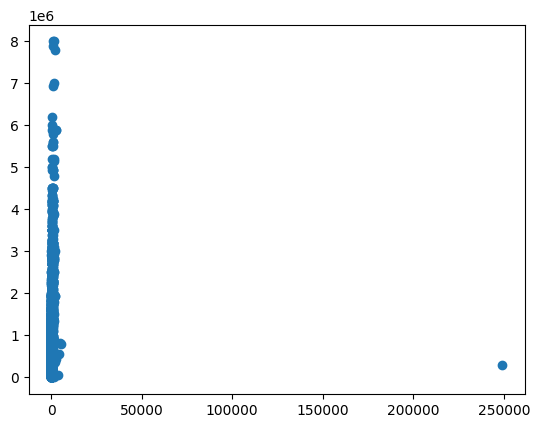

In [ ]:
# TODO: Code

import matplotlib.pyplot as plt

# ds_clean = ds.dropna()

x = ds_clean['surface']
y = ds_clean['price']


plt.figure()
plt.scatter(x, y)
plt.show()

In [89]:
ds_clean = ds_clean[ds_clean['surface'] < 1000].copy()

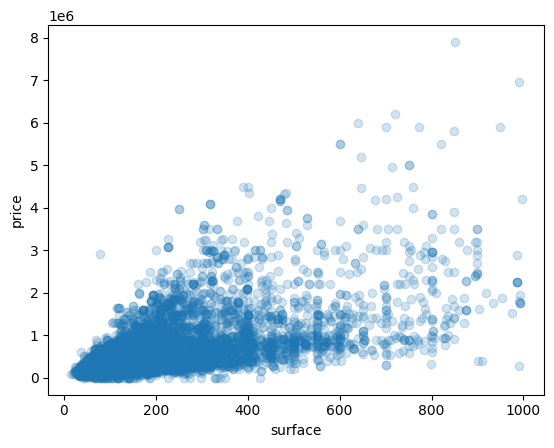

In [91]:
x = ds_clean['surface']
y = ds_clean['price']


plt.figure()
plt.scatter(x, y, alpha=0.2)
plt.xlabel('surface')
plt.ylabel('price')
plt.show()

<Axes: >

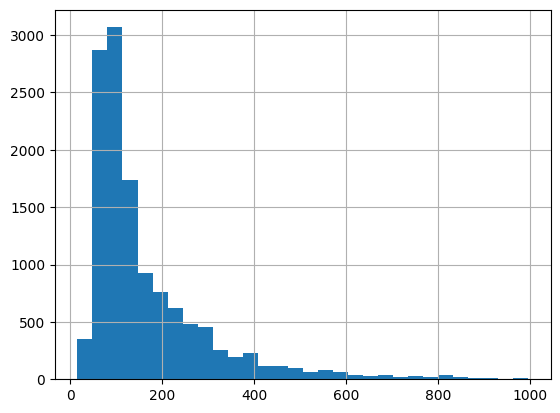

In [95]:
ds_clean['surface'].hist(bins=30)

<Axes: >

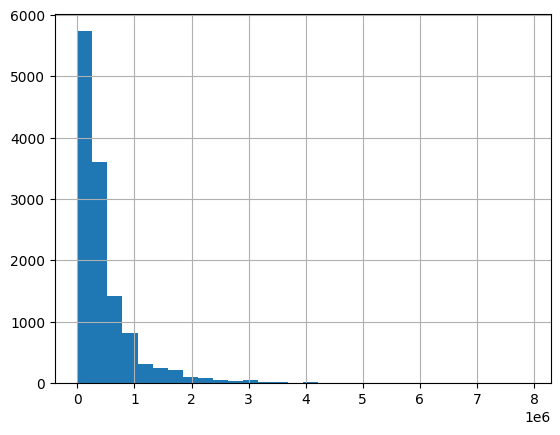

In [ ]:
ds_clean['price'].hist(bins=30)
# right skewed

In [100]:
ds_clean[['price', 'surface']].scatter()

AttributeError: 'DataFrame' object has no attribute 'scatter'

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 12. How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.

In [13]:
# TODO

#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.

In [14]:
# TODO

#### Exercise 14. Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`.

In [15]:
# TODO

#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.

In [16]:
# TODO: Code

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.

In [ ]:
# TODO

.var()

#### Exercise 17. What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population.

In [18]:
# TODO

#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot.

Hint: You can help yourself by reviewing the *multihist* demo of Matplotlib.

In [19]:
# TODO

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [20]:
# TODO

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)
 
Hint: Make a scatter plot of each population using subplots.

In [21]:
# TODO

#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [24]:
from ipyleaflet import Map, basemaps

# Map centered on south west part of Madrid
map = Map(center = (40.35, -3.8), zoom = 11.5, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.OpenStreetMap.Mapnik)
map

Map(center=[40.35, -3.8], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:
